<a href="https://colab.research.google.com/github/Koti-RK/Retail-Sales-Prediction/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann**

**Problem Description**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment

# **Data Description**

Rossmann Stores Data.csv - historical data including Sales

store.csv - supplemental information about the stores

**Data fields**

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

*   Id - an Id that represents a (Store, Date) duple within the test set


*   Store - a unique Id for each store


*   Sales - the turnover for any given day (this is what you are predicting)



*   Customers - the number of customers on a given day





*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

*   StoreType - differentiates between 4 different store models: a, b, c, d



*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor store

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened


*   Promo - indicates whether a store is running a promo on that day
*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating



*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store








**Rossmann Sales Dataset** - This dataset is a live dataset of Rossmann Stores. On analysing this problem we observe that rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem. In this Notebook we work on following topics Analysing the dataset by using Exploratory Data Analysis using exponential moving averages analyse trends and seasonality in Rossmann dataset Analyse Regression using following prediction analysis. A) Linear Regression Analysis B)Elastic Regression (Lasso & Ridge Regression). C) Dession tree

In [1]:
# importing libraries

import pandas as pd
import numpy as np

from pandas import datetime as dt
from pandas import Series,DataFrame

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split


# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

<ipython-input-1-9bc04505c387>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime as dt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rossman_df= pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/Rossmann Stores Data.csv')

In [4]:
store_df = pd.read_csv('/content/drive/MyDrive/Retail Sales Prediction/store.csv')

In [5]:
rossman_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
769152,588,7,2013-08-11,0,0,0,0,0,0
444020,1036,5,2014-05-30,6590,625,1,0,0,0
512781,667,6,2014-03-29,7895,753,1,0,0,0
701278,729,5,2013-10-11,10783,1090,1,1,0,0
257384,519,2,2014-12-09,5025,524,1,0,0,0


In [6]:
rossman_df.shape

(1017209, 9)

In [7]:
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_df.shape

(1115, 10)

In [10]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Checking null values**

In [11]:
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

No null values

In [12]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

we can see that there are lot of null values.. we have to deal with them.

<Axes: >

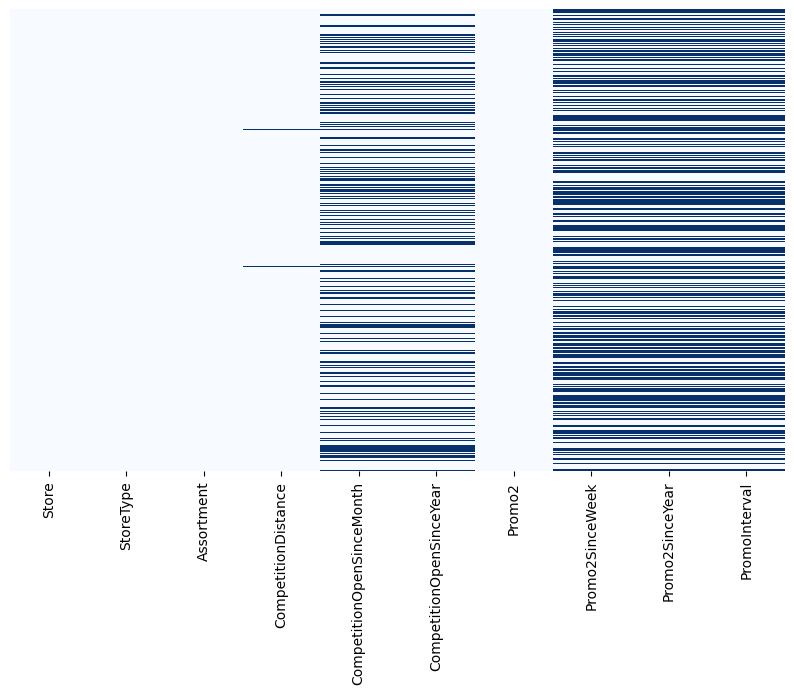

In [13]:
# heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'Blues')

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

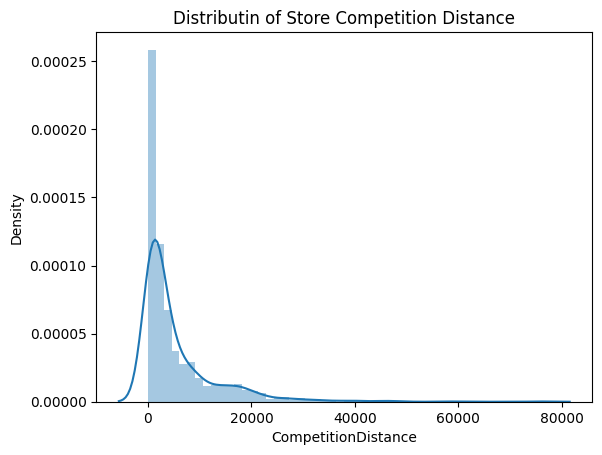

In [14]:
#Looking at distrubution
sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

Distribution is skewed towards right.. its better to replace this with median

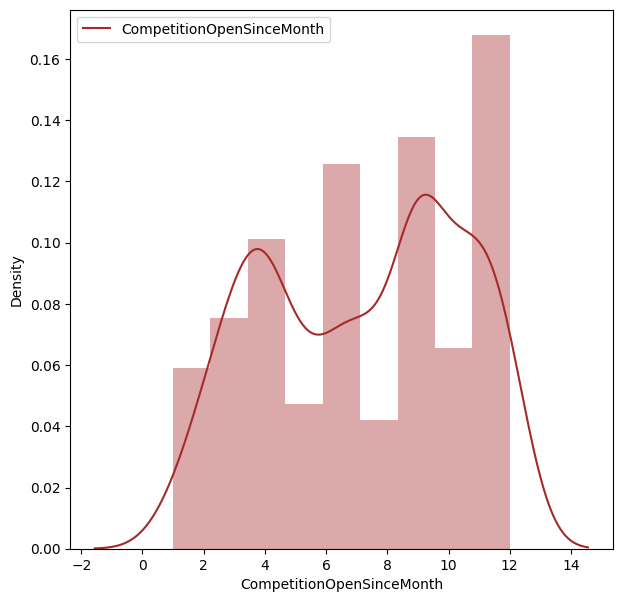

In [15]:
  # checking CompetitionOpenSinceMonth distributuion
plt.figure(figsize=(7,7))
sns.distplot(store_df['CompetitionOpenSinceMonth'],color = 'brown')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

CompetitionOpenSinceMonth is Left Skewed

We have decided to replace CompetitionOpenSinceYear and CompetitionOpenSinceMonth with mode because it would be better to repalce them with most frequesnt value.

In [16]:
# calculating mode for two colums
print(store_df['CompetitionOpenSinceMonth'].mode())
print(store_df['CompetitionOpenSinceYear'].mode())

0    9.0
Name: CompetitionOpenSinceMonth, dtype: float64
0    2013.0
Name: CompetitionOpenSinceYear, dtype: float64


In [17]:
# Replacing null values with median
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [18]:
# Replacing NAN values with 0 since most frequent value is 0 in CompetitionOpenSinceMonth
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)

# Replacing NAN values with 0 since most frequent value is 0 in CompetitionOpenSinceYear
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceWeek
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)

# Replacing NAN values with 0 in Promo2SinceYear
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)

# Replacing NAN values with 0 in PromoInterval
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [19]:
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**Merging Data Frames**

Now as the NAN values were removed I have decided to merge the two dataframes with left join on rossmann_df, as the rossmann data had more columns

In [20]:
merged_df = pd.merge(rossman_df, store_df, on='Store',how='left')

In [21]:
merged_df.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
540938,949,2,2014-03-04,7768,615,1,1,0,0,a,a,870.0,3.0,2006.0,0,0.0,0.0,0
438282,873,3,2014-06-04,4680,563,1,1,0,0,a,a,2040.0,11.0,2008.0,0,0.0,0.0,0
686528,474,4,2013-10-24,7055,674,1,1,0,1,c,a,14810.0,0.0,0.0,1,14.0,2011.0,"Mar,Jun,Sept,Dec"
556937,223,1,2014-02-17,11259,1009,1,1,0,1,d,c,2920.0,10.0,1995.0,1,27.0,2011.0,"Jan,Apr,Jul,Oct"
620584,315,7,2013-12-22,0,0,0,0,0,0,a,c,38710.0,4.0,2013.0,0,0.0,0.0,0


In [22]:
merged_df.shape

(1017209, 18)

In [23]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [24]:
# changing format of date from object to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format= '%Y-%m-%d')
     

In [25]:
#creating features from the date
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['WeekOfYear'] = merged_df['Date'].dt.weekofyear
merged_df['DayOfYear'] = merged_df['Date'].dt.dayofyear
years = merged_df['Year'].unique()

In [26]:
merged_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Month                                 int64
WeekOfYear                            int64
DayOfYear                             int64
dtype: object

Successfully changed data types.

In [27]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

**Exploratory Data Analysis**

<Axes: xlabel='StoreType', ylabel='count'>

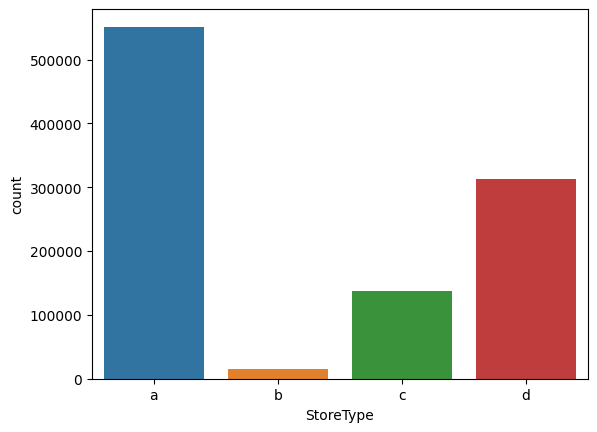

In [28]:
#Distribution of diffrent StoreType
sns.countplot(x='StoreType', data=merged_df, order=['a', 'b', 'c', 'd'])

<Axes: xlabel='Assortment', ylabel='count'>

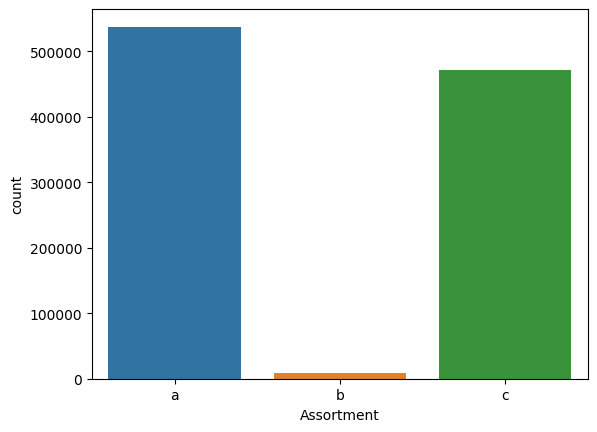

In [29]:
#Distribution of Assortment Type and Average sales
sns.countplot(x = 'Assortment', data = merged_df, order = ['a', 'b', 'c'])

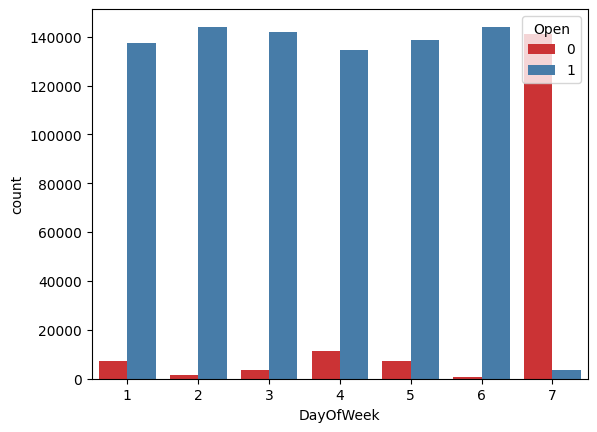

In [30]:
#Open And Close Relation on the basis of Weeks
sns.countplot( x='DayOfWeek', data=merged_df, hue="Open", palette="Set1");

Text(0.5, 1.0, 'Store Daily Promo Countplot')

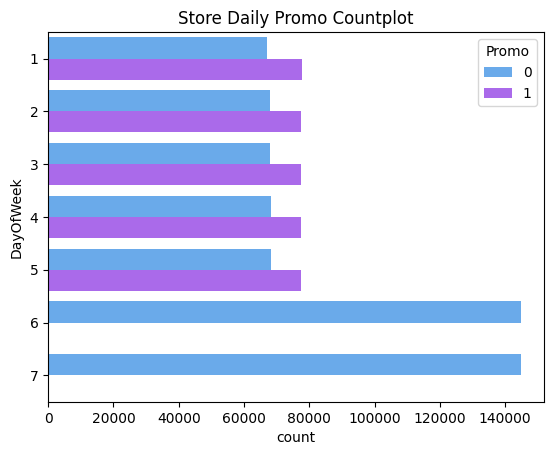

In [31]:
#plot between day of the week and Store daily promo
sns.countplot(y= 'DayOfWeek', hue='Promo', data= merged_df, palette= 'cool')
plt.title('Store Daily Promo Countplot')

<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='count'>

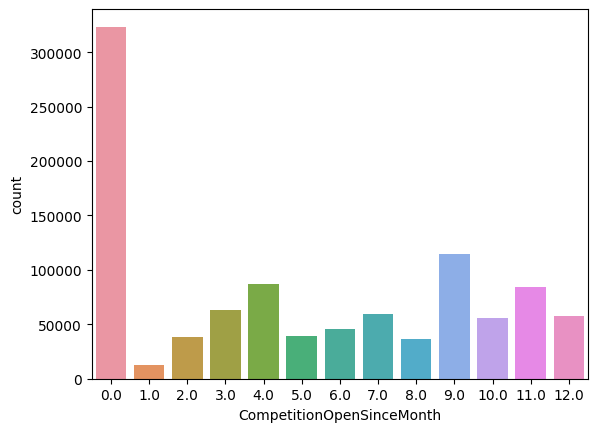

In [32]:
#count of CompetitionOpenSinceMonth
sns.countplot(x= 'CompetitionOpenSinceMonth', data=merged_df)

<Axes: xlabel='Promo', ylabel='Sales'>

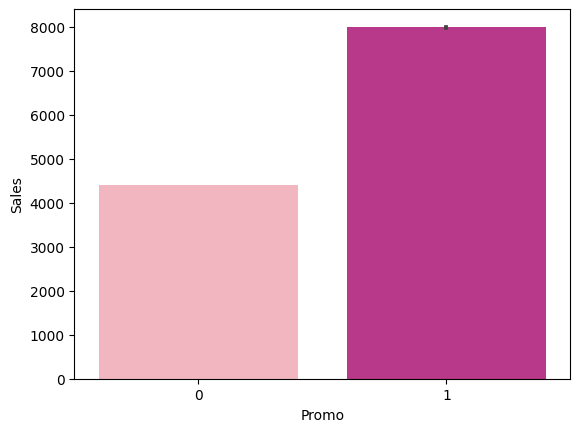

In [33]:
#Promo Sales
sns.barplot(x= 'Promo', y= 'Sales', data= merged_df, palette= 'RdPu')

**Sales during state holiday and school holiday**

0 = Public Holiday, 1 = Easter Holiday, 2 = Chirstmas, 3 = None

Text(0.5, 1.0, 'Sales During State Holiday')

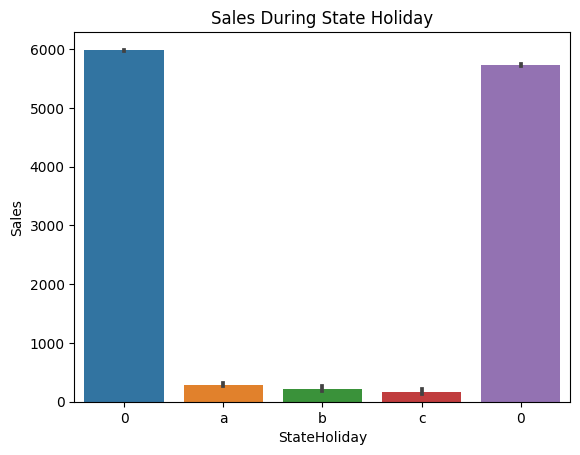

In [34]:
Stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=merged_df)
plt.title('Sales During State Holiday')

Text(0.5, 1.0, 'Sales During School Holiday')

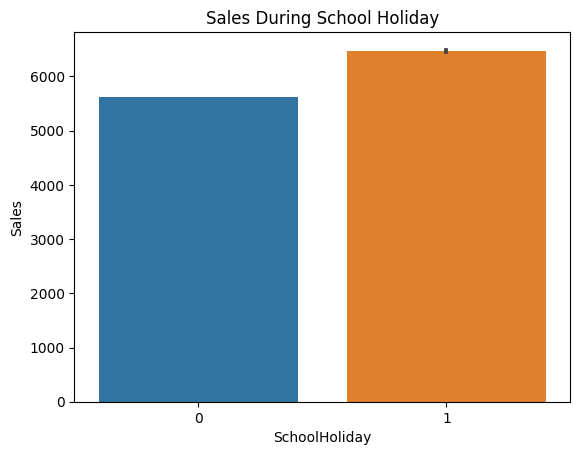

In [35]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales",data=merged_df)
plt.title('Sales During School Holiday')

Text(0.5, 1.0, 'Boxplot For Sales Values')

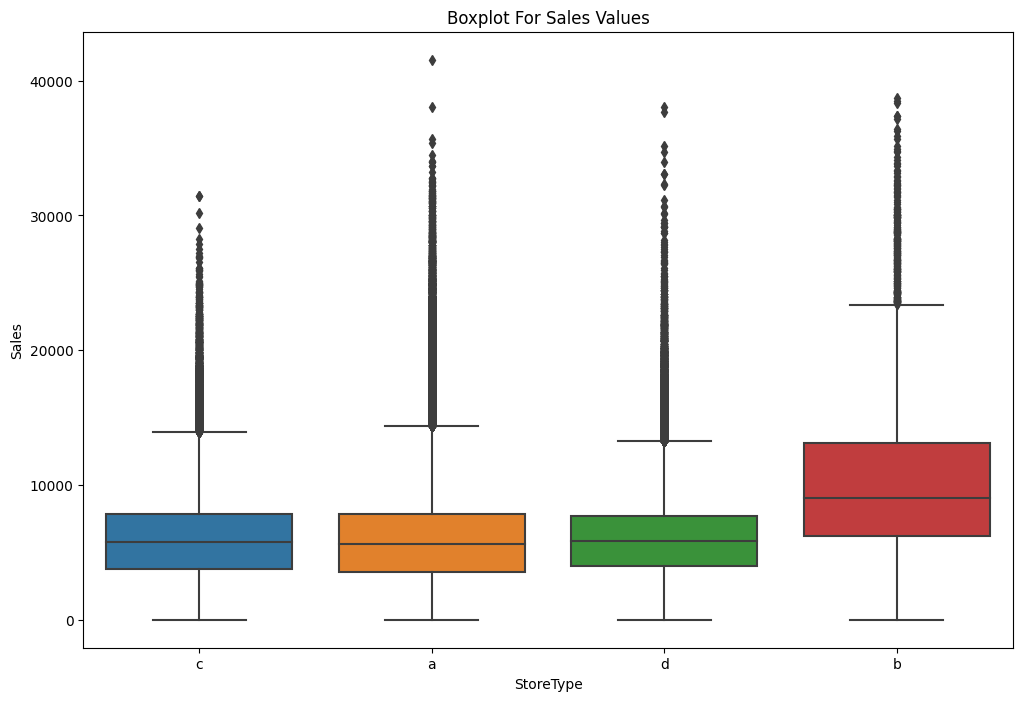

In [36]:
#Boxplot For Sales Values
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=merged_df)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales  Values on the basis of Assortment Level')

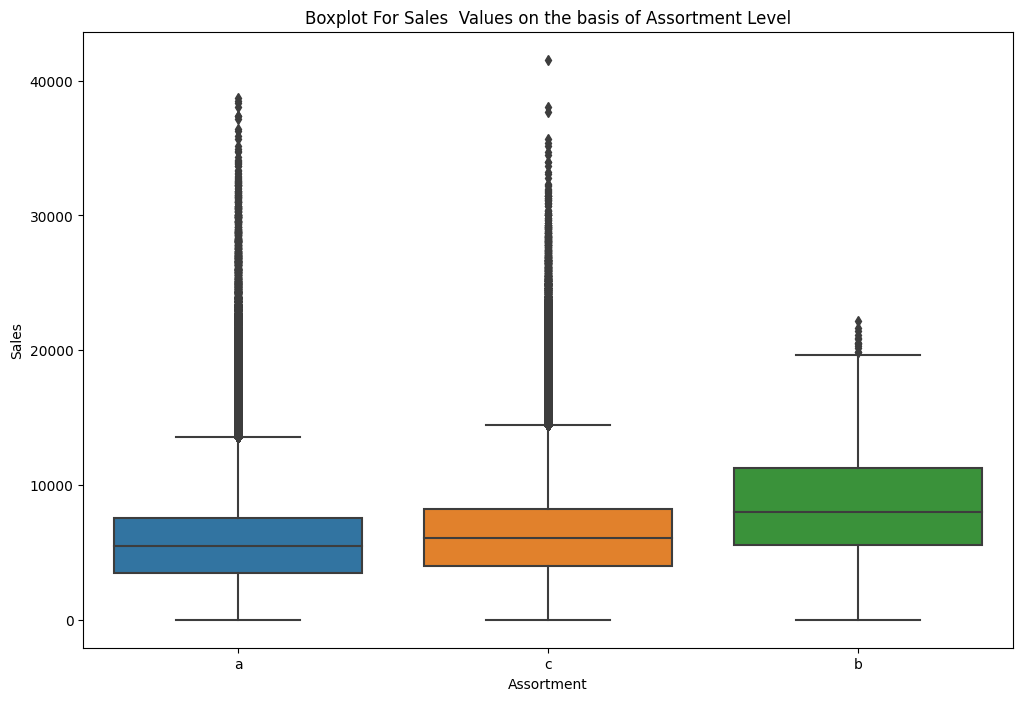

In [37]:
#Boxplot For Sales  Values on the basis of Assortment Level
plt.figure(figsize=(12,8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=merged_df)
plt.title('Boxplot For Sales  Values on the basis of Assortment Level')

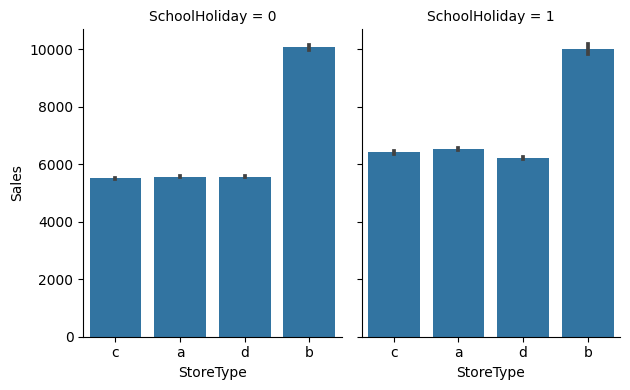

In [38]:
#Impact of School Holiday on Sales

g = sns.FacetGrid(merged_df, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

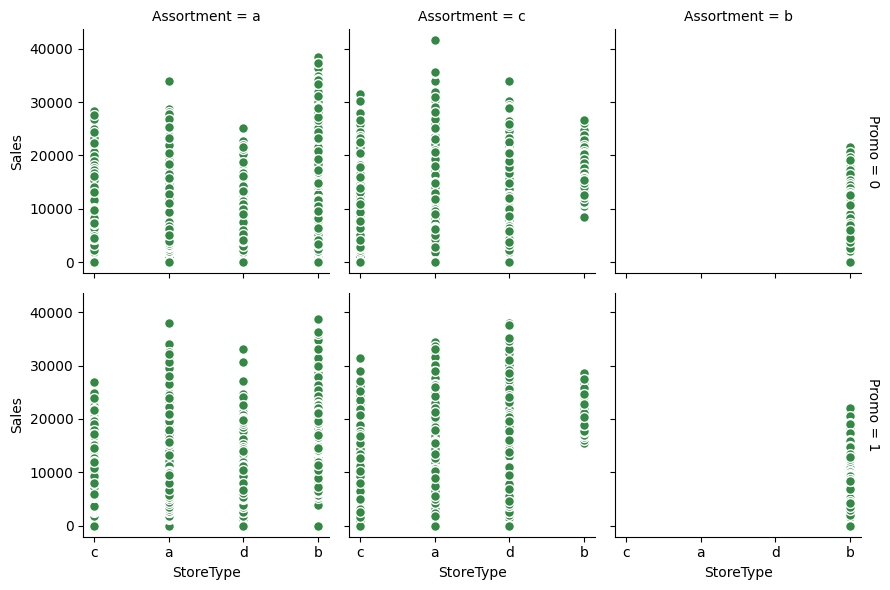

In [39]:
#Impact of Sales w.r.t Promo , Assortments & StoreType
g = sns.FacetGrid(merged_df, col="Assortment", row="Promo", margin_titles=True, height=3)
g.map(plt.scatter,  "StoreType","Sales", color="#338844", edgecolor="white", s=50, lw=1)
# g.set(xlim=(0, 50), ylim=(0, 100));

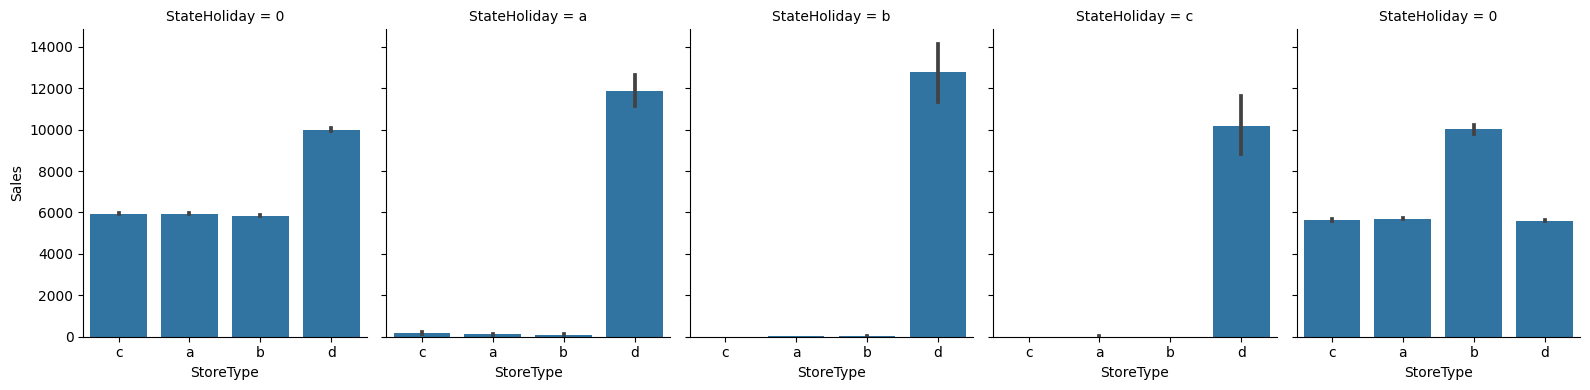

In [40]:
#Impact on Sales w.r.t StateHoliday
g = sns.FacetGrid(merged_df, col="StateHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

<Axes: xlabel='DayOfWeek', ylabel='Customers'>

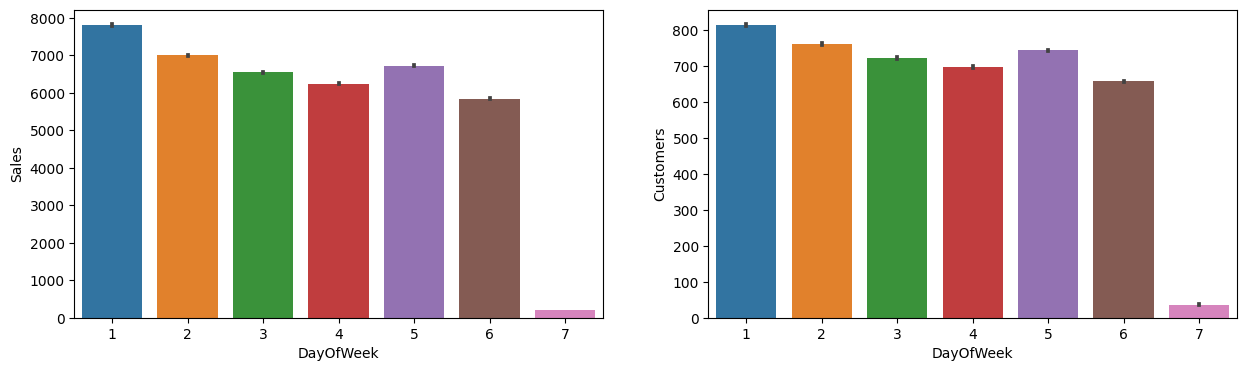

In [41]:
#Which day of the week has maximum sales and Customers
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=merged_df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=merged_df, order=[1,2,3,4,5,6,7], ax=axis2)

# Correlation 

In [43]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = merged_df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)
     

<Axes: >

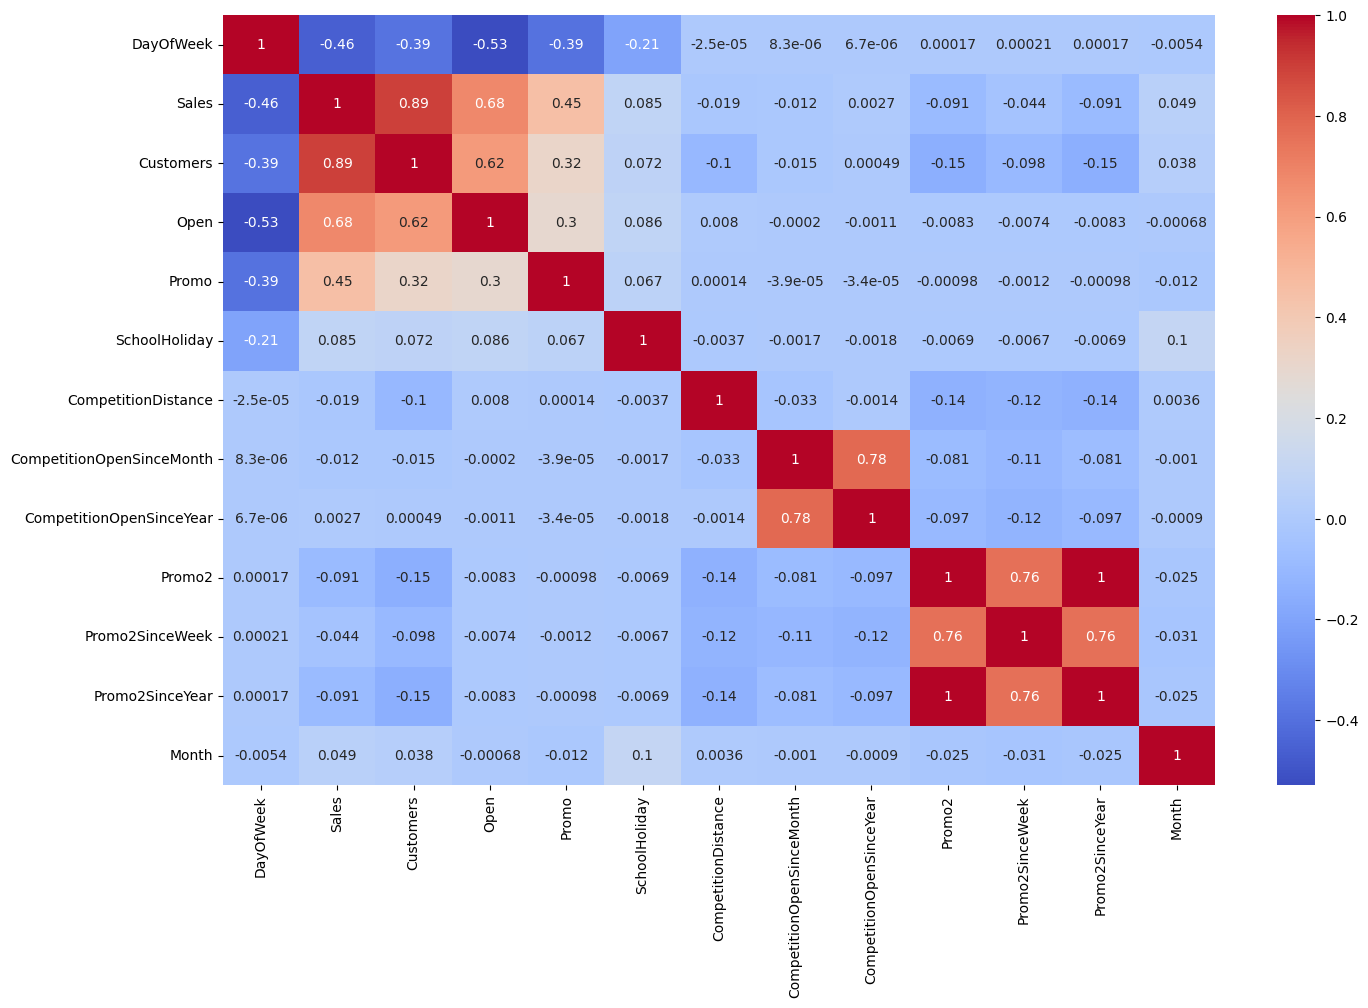

In [44]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)
     

In [46]:
#Month to month comparision with sales
monthly=merged_df[['Date','Sales']]
monthly['Diffrence']=monthly['Sales'].diff(1)
monthly['Month']=monthly['Date'].dt.month

monthly=monthly.groupby('Month')['Sales'].sum()
monthly=monthly.reset_index()
monthly['difference']=monthly['Sales'].diff(1)
monthly['MoM percentage diff']=round(monthly['difference']/monthly['Sales']*100,2)
monthly
     

,Month,Sales,difference,MoM percentage diff
0,1,566728724,NaN,NaN
1,2,528734410,-37994314.0,-7.19
2,3,599831906,71097496.0,11.85
3,4,575895295,-23936611.0,-4.16
4,5,569248217,-6647078.0,-1.17
5,6,578112775,8864558.0,1.53
6,7,595059205,16946430.0,2.85
7,8,361791202,-233268003.0,-64.48
8,9,342570131,-19221071.0,-5.61
9,10,351878728,9308597.0,2.65


<Axes: title={'center': 'Monthly Sales'}, xlabel='Month'>

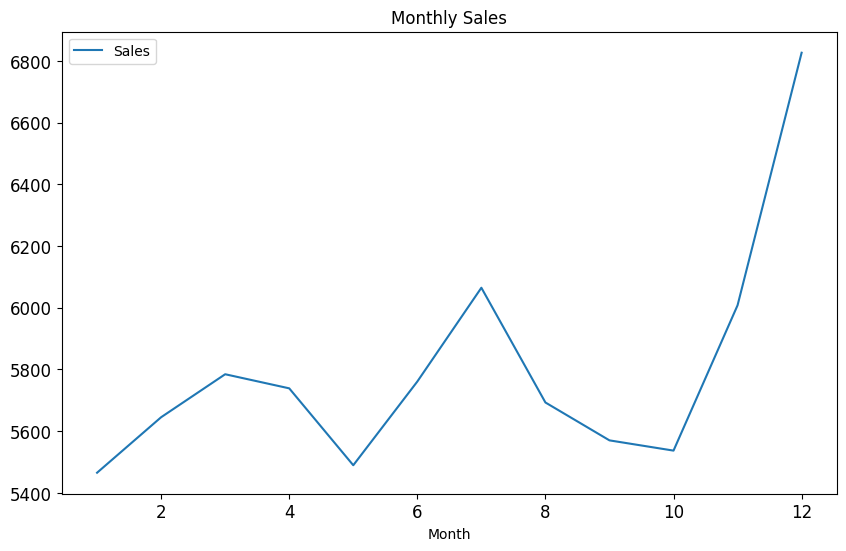

In [47]:
#Plotting Month to month comparision
merged_df[['Month','Sales']].groupby('Month').mean().plot(figsize=(10,6),fontsize=12,title='Monthly Sales')

# **Feature Engineering**

In [48]:
def comp_months(merged_df):
  # making a function to combine competition all columns and making single column of comp months
    merged_df['CompetitionOpen'] = 12 * (merged_df.Year - merged_df.CompetitionOpenSinceYear) + (merged_df.Month - merged_df.CompetitionOpenSinceMonth)
    merged_df['CompetitionOpen'] = merged_df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [49]:

#since the stores closed had 0 sale value; removing the irrelevant part
new_df = merged_df[merged_df.Open != 0]
new_df.drop('Open', axis=1, inplace=True)

<Axes: xlabel='Sales', ylabel='Density'>

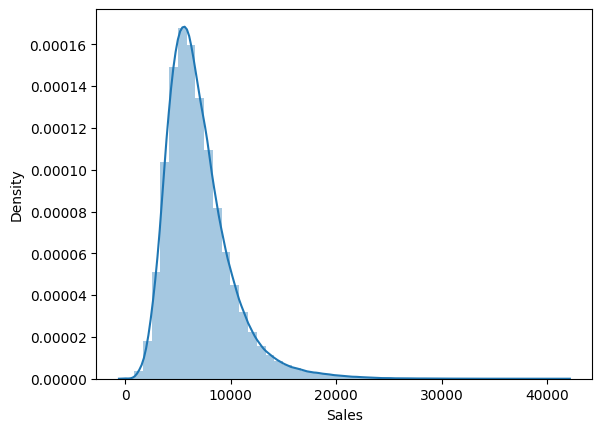

In [50]:
sns.distplot(new_df["Sales"])

In [51]:
new_df['Sales'] = np.log(new_df['Sales'])

In [52]:
new_df.dropna(inplace=True)

In [53]:
new_df.drop(new_df[new_df['Sales'] == float("-inf")].index,inplace=True)

<Axes: xlabel='Sales', ylabel='Density'>

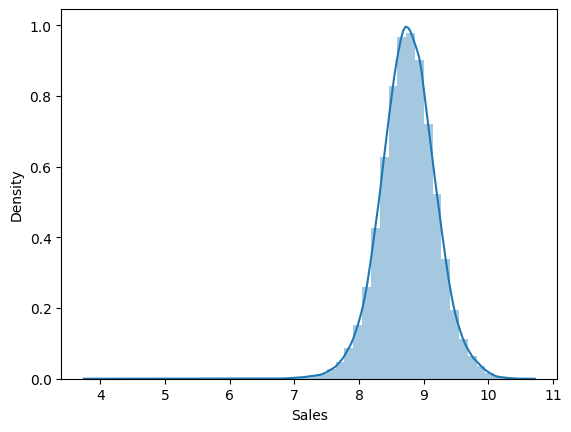

In [54]:
sns.distplot(new_df["Sales"])

In [55]:
#changing into boolean 
new_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [56]:
#combining competition open since month and year into total months
new_df['CompetitionOpen'] = (new_df['Year'] - new_df['CompetitionOpenSinceYear'])*12 + (new_df['Month'] - new_df['CompetitionOpenSinceMonth'])
new_df['CompetitionOpen']
     

0             82.0
1             92.0
2            103.0
3             70.0
4              3.0
            ...   
1016776       76.0
1016827      159.0
1016863    24157.0
1017042    24157.0
1017190      130.0
Name: CompetitionOpen, Length: 844338, dtype: float64

In [57]:
#correcting the neg values
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
new_df['CompetitionOpen'] 

0             82.0
1             92.0
2            103.0
3             70.0
4              3.0
            ...   
1016776       76.0
1016827      159.0
1016863    24157.0
1017042    24157.0
1017190      130.0
Name: CompetitionOpen, Length: 844338, dtype: float64

In [58]:
#dropping both the columns
new_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [60]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
new_df['Promo2Open'] = (new_df['Year'] - new_df['Promo2SinceYear'])*12 + (new_df['WeekOfYear'] - new_df['Promo2SinceWeek'])*0.230137 + (new_df['Promo2'])
new_df['Promo2Open']

0          24187.134247
1             65.142466
2             52.912329
3          24187.134247
4          24187.134247
               ...     
1016776    24156.230137
1016827    24156.230137
1016863        2.183561
1017042    24156.230137
1017190    24156.230137
Name: Promo2Open, Length: 844338, dtype: float64

In [62]:
#correcting the neg values
new_df['Promo2Open'] = new_df['Promo2Open'].apply(lambda x:0 if x < 0 else x)*new_df['Promo2']
new_df['Promo2Open']

0           0.000000
1          65.142466
2          52.912329
3           0.000000
4           0.000000
             ...    
1016776     0.000000
1016827     0.000000
1016863     2.183561
1017042     0.000000
1017190     0.000000
Name: Promo2Open, Length: 844338, dtype: float64

In [63]:
#dropping both the columns
new_df.drop(['Promo2SinceYear','Promo2SinceWeek','Promo2'], axis=1,inplace=True)

In [65]:

#creating a feature for promo interval and checking if promo2 was running in the sale month
month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
new_df["PromoRunning"] = new_df.apply(lambda row: 1 if month_dict[row['Month']] in str(row['PromoInterval']).split(',') else 0, axis=1)
new_df["PromoRunning"]
     

0          0
1          1
2          1
3          0
4          0
          ..
1016776    0
1016827    0
1016863    1
1017042    0
1017190    0
Name: PromoRunning, Length: 844338, dtype: int64

In [66]:
#Dropping unecessary columns
new_df.drop(['PromoInterval'],axis=1,inplace=True)

In [67]:
#setting date and store as index
new_df.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
new_df.sort_index(inplace=True)

In [68]:
new_df['Sales'].skew()

-0.10968460576537627

In [69]:
print("Mean value of Sales",new_df['Sales'].mean())
print("Std value of Sales",new_df['Sales'].std())
print("Min value of Sales",new_df['Sales'].min())
print("Max value of Sales",new_df['Sales'].max())

Mean value of Sales 8.757564213126626
Std value of Sales 0.4252783465318163
Min value of Sales 3.828641396489095
Max value of Sales 10.634676867382668


In [70]:
# Finding the boundary values
print("Highest allowed",new_df['Sales'].mean() + 3*new_df['Sales'].std())
print("Lowest allowed",new_df['Sales'].mean() - 3*new_df['Sales'].std())
     

Highest allowed 10.033399252722075
Lowest allowed 7.481729173531177


In [71]:
# Finding the outliers
new_df[(new_df['Sales'] > 10.03) | (new_df['Sales'] < 7.48)]

DayOfWeek      Sales  Customers  Promo StateHoliday  \
Date       Store                                                        
2013-01-02 232            3   7.088409        148      0            0   
           339            3   7.245655        251      0            0   
           589            3   7.471932        281      0            0   
           817            3  10.140810       3462      0            0   
2013-01-03 232            4   7.338238        174      0            0   
...                     ...        ...        ...    ...          ...   
2015-07-31 262            5  10.157122       3669      1            0   
           756            5  10.137769       2901      1            0   
           817            5  10.047285       2884      1            0   
           842            5  10.085642       1362      1            0   
           1114           5  10.222232       3745      1            0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-02 232                1         c          c              13570.0   
           339                1         a          c               2280.0   
           589                1         a          c                360.0   
           817                1         a          a                140.0   
2013-01-03 232                1         c          c              13570.0   
...                         ...       ...        ...                  ...   
2015-07-31 262                1         b          a               1180.0   
           756                1         a          c                 50.0   
           817                1         a          a                140.0   
           842                0         d          c               1200.0   
           1114               1         a          c                870.0   

                  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                        
2013-01-02 232    2013      1           1          2             32.0   
           339    2013      1           1          2          24157.0   
           589    2013      1           1          2          24157.0   
           817    2013      1           1          2             82.0   
2013-01-03 232    2013      1           1          3             32.0   
...                ...    ...         ...        ...              ...   
2015-07-31 262    2015      7          31        212             26.0   
           756    2015      7          31        212          24187.0   
           817    2015      7          31        212            112.0   
           842    2015      7          31        212             92.0   
           1114   2015      7          31        212          24187.0   

                  Promo2Open  PromoRunning  
Date       Store                            
2013-01-02 232      0.000000             0  
           339      0.000000             0  
           589      0.000000             0  
           817      0.000000             0  
2013-01-03 232      0.000000             0  
...                      ...           ...  
2015-07-31 262      0.000000             0  
           756     46.928767             1  
           817      0.000000             0  
           842      0.000000             0  
           1114     0.000000             0  

[5000 rows x 16 columns]

In [72]:
upper_limit = new_df['Sales'].mean() + 3*new_df['Sales'].std()
lower_limit = new_df['Sales'].mean() - 3*new_df['Sales'].std()

In [74]:
new_df['Sales'].describe()

count    844338.000000
mean          8.757564
std           0.425278
min           3.828641
25%           8.488588
50%           8.759198
75%           9.031214
max          10.634677
Name: Sales, dtype: float64

<Axes: ylabel='Density'>

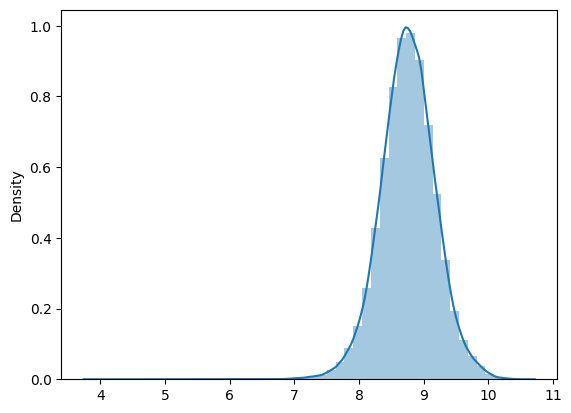

In [75]:
sns.distplot(x=new_df["Sales"])